In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error


%matplotlib inline

# Удаление дубликатов в данных

In [4]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4],
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [5]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [6]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [7]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [8]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [11]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [12]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [13]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [15]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan],
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [16]:
data.dropna()

,0,1,2,3


In [17]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [18]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [19]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [21]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,1.013830,NaN,NaN
1,0.084789,NaN,NaN
2,1.240260,NaN,-0.105612
3,0.012659,NaN,-0.313670
4,-1.106481,-0.161658,0.990896
5,-0.134666,0.022950,-0.026190
6,0.608788,-0.920338,-0.138171


In [22]:
df.fillna(0)

,0,1,2
0,1.013830,0.000000,0.000000
1,0.084789,0.000000,0.000000
2,1.240260,0.000000,-0.105612
3,0.012659,0.000000,-0.313670
4,-1.106481,-0.161658,0.990896
5,-0.134666,0.022950,-0.026190
6,0.608788,-0.920338,-0.138171


In [23]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,1.013830,0.500000,0.000000
1,0.084789,0.500000,0.000000
2,1.240260,0.500000,-0.105612
3,0.012659,0.500000,-0.313670
4,-1.106481,-0.161658,0.990896
5,-0.134666,0.022950,-0.026190
6,0.608788,-0.920338,-0.138171


In [24]:
df.fillna(method="bfill")

,0,1,2
0,1.013830,-0.161658,-0.105612
1,0.084789,-0.161658,-0.105612
2,1.240260,-0.161658,-0.105612
3,0.012659,-0.161658,-0.313670
4,-1.106481,-0.161658,0.990896
5,-0.134666,0.022950,-0.026190
6,0.608788,-0.920338,-0.138171


In [25]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,1.013830,NaN,-0.105612
1,0.084789,NaN,-0.105612
2,1.240260,-0.161658,-0.105612
3,0.012659,-0.161658,-0.313670
4,-1.106481,-0.161658,0.990896
5,-0.134666,0.022950,-0.026190
6,0.608788,-0.920338,-0.138171


In [26]:
df.fillna(df.mean())

,0,1,2
0,1.013830,-0.353015,0.081450
1,0.084789,-0.353015,0.081450
2,1.240260,-0.353015,-0.105612
3,0.012659,-0.353015,-0.313670
4,-1.106481,-0.161658,0.990896
5,-0.134666,0.022950,-0.026190
6,0.608788,-0.920338,-0.138171


In [27]:
df.fillna(df.median())

,0,1,2
0,1.013830,-0.161658,-0.105612
1,0.084789,-0.161658,-0.105612
2,1.240260,-0.161658,-0.105612
3,0.012659,-0.161658,-0.313670
4,-1.106481,-0.161658,0.990896
5,-0.134666,0.022950,-0.026190
6,0.608788,-0.920338,-0.138171


Медиана более устойчива к выбросам

In [29]:
data_all = []
for i in range(10000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)

data_all = np.array(data_all)

<Axes: >

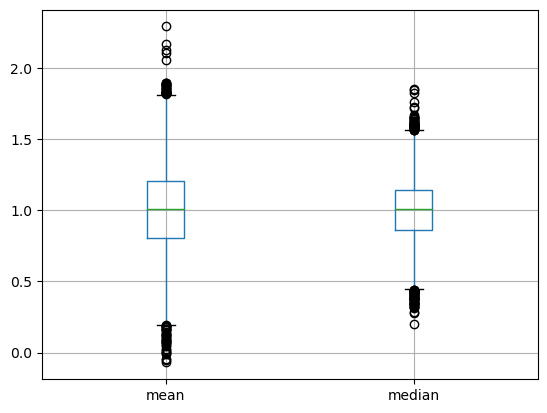

In [30]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [32]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,1.013830,NaN,NaN,1
1,0.084789,NaN,NaN,1
2,1.240260,NaN,-0.105612,0
3,0.012659,NaN,-0.313670,0
4,-1.106481,-0.161658,0.990896,0
5,-0.134666,0.022950,-0.026190,0
6,0.608788,-0.920338,-0.138171,0


Замена значений

In [34]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [35]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [38]:
data = pd.Series(["male"]*10 + ["female"]*5)
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [39]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [41]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [42]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [43]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ...

In [45]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [46]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
5,False,False,False,False,True,False
6,False,False,False,False,False,True
7,False,True,False,False,False,False
8,False,False,True,False,False,False
9,False,False,False,True,False,False


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Работа со временем

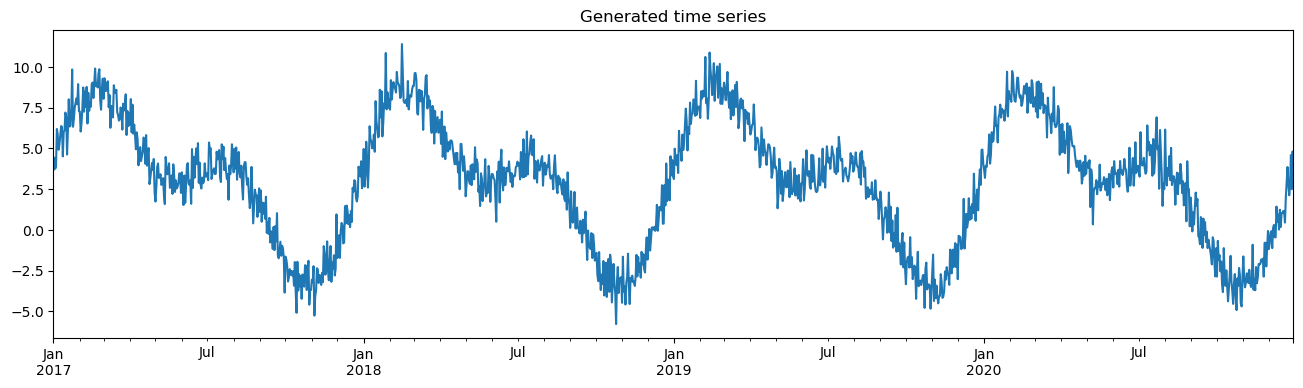

In [50]:
np.random.seed(12345)

range_of_dates = pd.date_range(start="2017-01-01", end="2020-12-30")
X = pd.DataFrame(index=range_of_dates)

X["day_nr"] = range(len(X))
X["day_of_year"] = X.index.day_of_year

signal_1 = 3 + 4 * np.sin(X["day_nr"] / 365 * 2 * np.pi)
signal_2 = 3 * np.sin(X["day_nr"] / 365 * 4 * np.pi + 365/2)
noise = np.random.normal(0, 0.85, len(X))

y = signal_1 + signal_2 + noise

y.plot(figsize=(16,4), title="Generated time series");

In [51]:
X

,day_nr,day_of_year
2017-01-01,0,1
2017-01-02,1,2
2017-01-03,2,3
2017-01-04,3,4
2017-01-05,4,5
...,...,...
2020-12-26,1455,361
2020-12-27,1456,362
2020-12-28,1457,363
2020-12-29,1458,364


In [52]:
results_df = y.to_frame()
results_df.columns = ["actuals"]

In [53]:
TRAIN_END = 3 * 365

## Подход 1 - категориальные переменные

In [55]:
X_1 = pd.DataFrame(data=pd.get_dummies(X.index.month, drop_first=True, prefix="month"))
X_1.index = X.index
X_1

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2017-01-01,False,False,False,False,False,False,False,False,False,False,False
2017-01-02,False,False,False,False,False,False,False,False,False,False,False
2017-01-03,False,False,False,False,False,False,False,False,False,False,False
2017-01-04,False,False,False,False,False,False,False,False,False,False,False
2017-01-05,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,False,False,False,False,False,False,False,False,False,False,True
2020-12-27,False,False,False,False,False,False,False,False,False,False,True
2020-12-28,False,False,False,False,False,False,False,False,False,False,True
2020-12-29,False,False,False,False,False,False,False,False,False,False,True


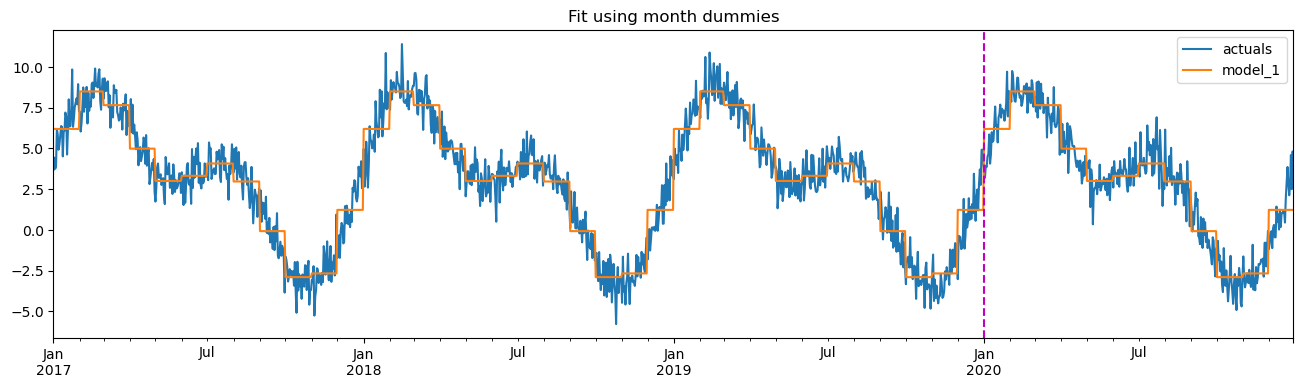

In [56]:
model_1 = LinearRegression().fit(X_1.iloc[:TRAIN_END], y.iloc[:TRAIN_END])

results_df["model_1"] = model_1.predict(X_1)
results_df[["actuals", "model_1"]].plot(figsize=(16,4), title="Fit using month dummies")

plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [57]:
print(model_1.score(X_1.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_1.score(X_1.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.9032966594007233
0.9013303218307308


## Подход 2 - циклическое кодирование с синусом/косинусом

In [59]:
def sin_transformer(period):
 return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
 return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

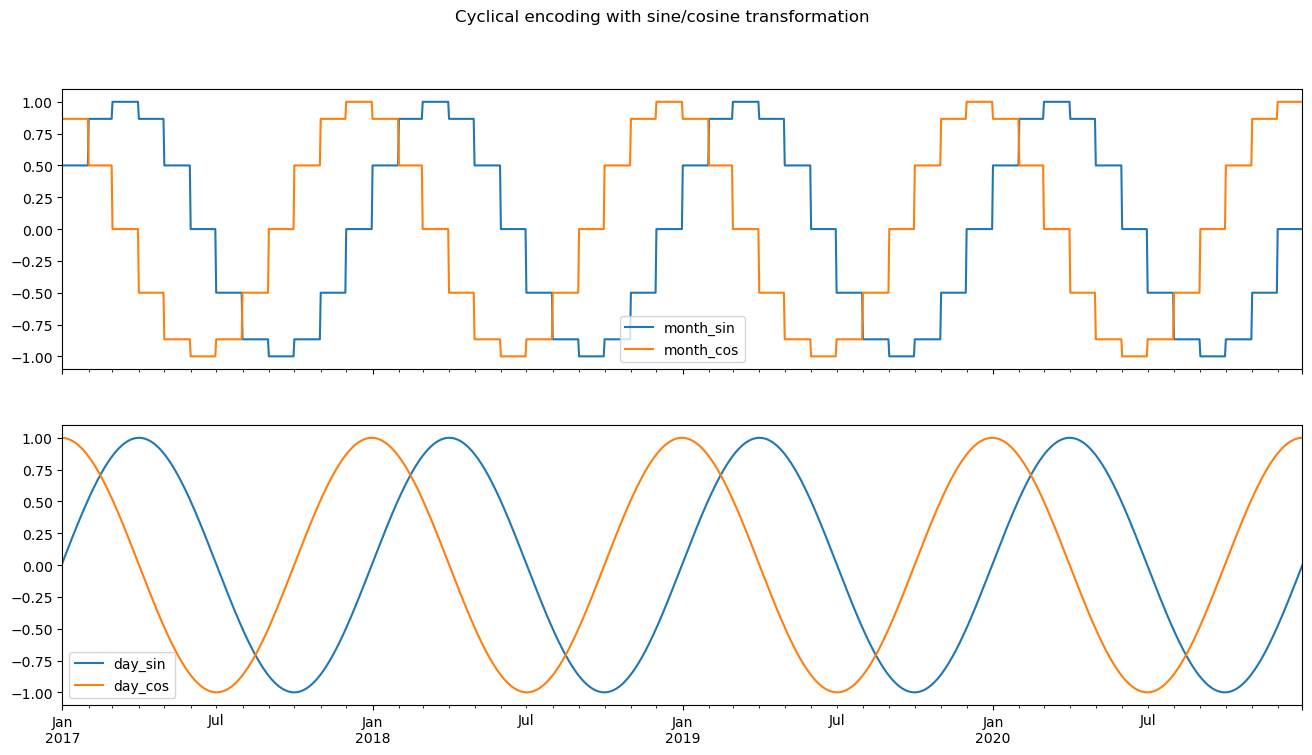

In [60]:
X_2 = X.copy()
X_2["month"] = X_2.index.month

X_2["month_sin"] = sin_transformer(12).fit_transform(X_2)["month"]
X_2["month_cos"] = cos_transformer(12).fit_transform(X_2)["month"]

X_2["day_sin"] = sin_transformer(365).fit_transform(X_2)["day_of_year"]
X_2["day_cos"] = cos_transformer(365).fit_transform(X_2)["day_of_year"]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,8))
X_2[["month_sin", "month_cos"]].plot(ax=ax[0])
X_2[["day_sin", "day_cos"]].plot(ax=ax[1])
plt.suptitle("Cyclical encoding with sine/cosine transformation");

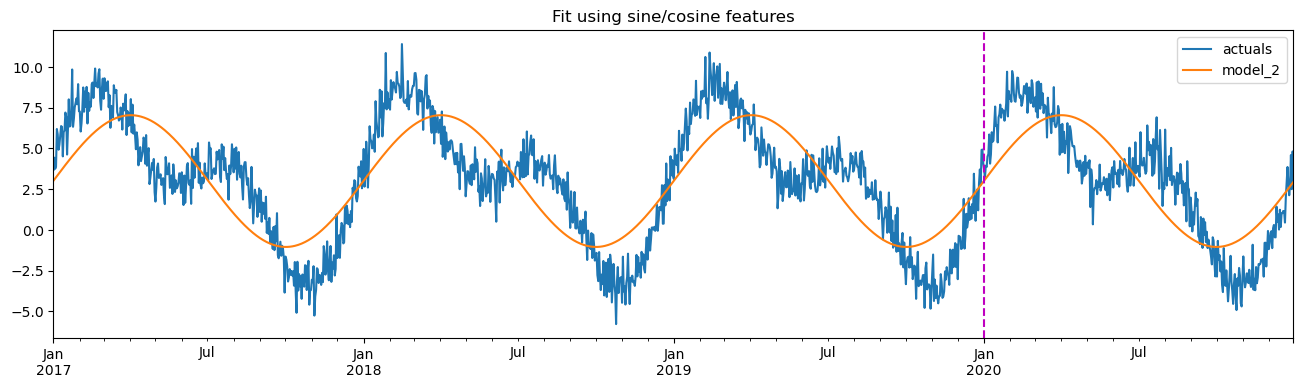

In [61]:
X_2_daily = X_2[["day_sin", "day_cos"]]

model_2 = LinearRegression().fit(X_2_daily.iloc[:TRAIN_END],
 y.iloc[:TRAIN_END])

results_df["model_2"] = model_2.predict(X_2_daily)
results_df[["actuals", "model_2"]].plot(figsize=(16,4),
 title="Fit using sine/cosine features")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [62]:
print(model_2.score(X_2_daily.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_2.score(X_2_daily.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.6100625066720329
0.5899965166638506


In [63]:
X_concat = pd.concat([X_1, X_2_daily], axis=1)

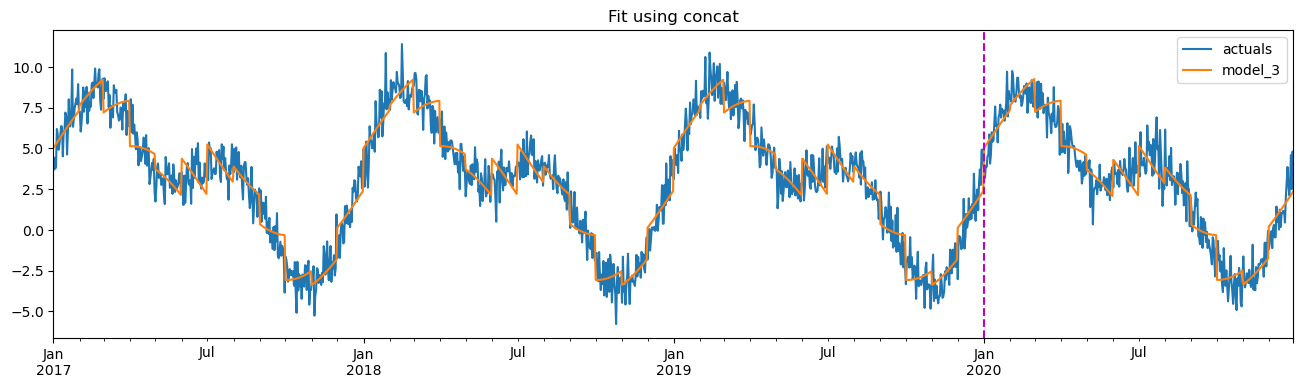

In [64]:
model_concat = LinearRegression().fit(X_concat.iloc[:TRAIN_END], y.iloc[:TRAIN_END])

results_df["model_3"] = model_concat.predict(X_concat)
results_df[["actuals", "model_3"]].plot(figsize=(16,4), title="Fit using concat")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [65]:
print(model_concat.score(X_concat.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_concat.score(X_concat.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.9211414853927441
0.9145793856126095


## Подход 3 - радиальные базисные функции

# Создание новых признаков

Полиномиальные признаки

In [69]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [71]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<Axes: title={'center': '0'}>]], dtype=object)

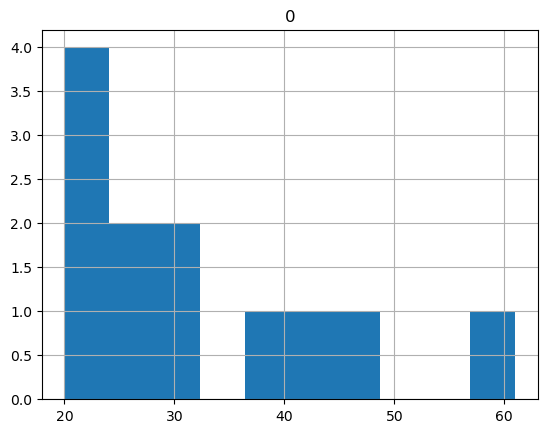

In [74]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [75]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [76]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [80]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

/tmp/ipykernel_3557/645094770.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist= False, kde= True)


<Axes: ylabel='Density'>

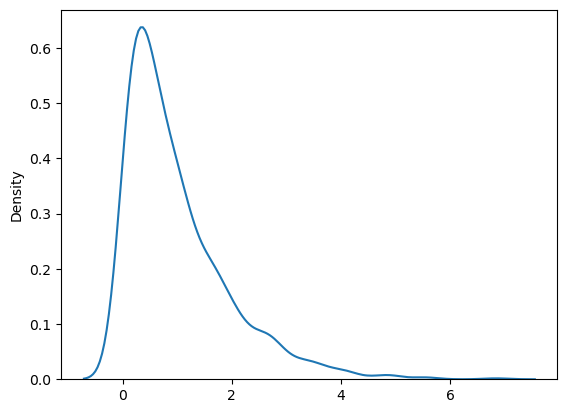

In [82]:
from scipy. stats import boxcox

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

/tmp/ipykernel_3557/2839650521.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<Axes: ylabel='Density'>

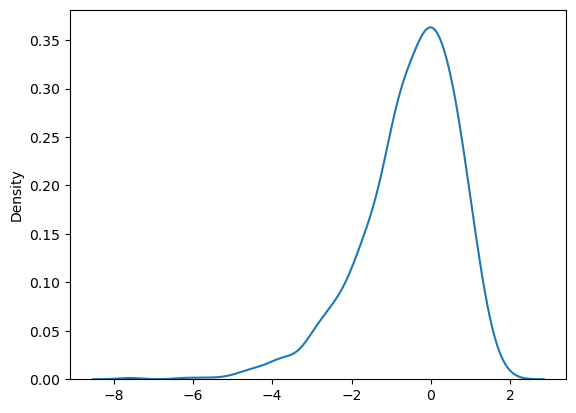

In [83]:
transformed_data = np.log(data)
sns.distplot(transformed_data, hist=False, kde=True)

/tmp/ipykernel_3557/673703192.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False , kde=True)


<Axes: ylabel='Density'>

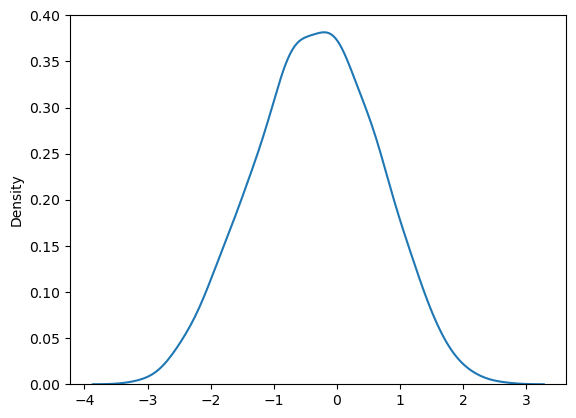

In [84]:
transformed_data, best_lambda = boxcox(data)

sns.distplot(transformed_data, hist=False , kde=True)

In [85]:
best_lambda

0.28094034465168566

# Домашнее задание

In [87]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

Задача: добиться наименьшего MSE на test.

## Baseline

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [91]:
df.sample(20)

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
34100,48335,3,-1.0,33105,9.0,-1.0,3,7,4,2007,...,4,2,13,66.0,2011.0,35,3,0,1,2956
15402,21893,3,-1.0,45724,16.5,6.9,0,6,5,2008,...,4,2,13,63.0,2013.0,10,3,0,1,2760
37962,53782,0,-1.0,8578,10.0,5.2,0,3,4,2003,...,1,2,8,30.0,2005.0,16,3,0,1,2340
17206,24447,3,-1.0,59506,10.5,10.4,3,6,4,2015,...,4,2,30,72.0,2018.0,16,3,0,1,2819
22072,31256,3,-1.0,43632,16.5,4.9,0,4,5,2018,...,4,2,13,51.0,-1.0,10,3,0,1,2760
12690,18073,3,-1.0,49791,-1.0,-1.0,0,4,6,1997,...,4,2,13,62.0,2001.0,10,3,0,1,2690
34267,48560,8,-1.0,41930,8.4,-1.0,0,5,4,1985,...,1,2,13,-1.0,1988.0,10,3,0,1,2690
14165,20129,8,-1.0,53547,9.3,-1.0,0,4,4,2008,...,4,2,13,35.0,2016.0,5,3,0,1,2340
38659,54765,3,-1.0,26897,9.5,-1.0,0,4,4,1996,...,4,2,13,60.0,2001.0,16,3,0,0,2580
14957,21240,8,-1.0,49625,-1.0,-1.0,0,3,4,2011,...,4,1,13,35.0,2015.0,26,3,0,1,2385


In [92]:
df.isna().sum() #проверим на пропуски в данных

index                             0
back-suspension                   0
battery-capacity                  0
charge-time                       0
compression                       0
consumption-mixed                 0
cylinders-order                   0
cylinders-value                   0
engine-feeding                    0
engine-start                      0
engine-stop                       0
engine-type                       0
gear-type                         0
luxury                            0
max-speed                         0
power-electro-kw                  0
supply-system                     0
valves                            0
valvetrain                        0
weight                            0
configurations_auto-premiere      0
configurations_back-wheel-base    0
configurations_front-brake        0
configurations_safety-rating      0
configurations_seats              0
configurations_tank-volume        0
supergen_year-stop                0
models_country-from         

**Пропусков не оказалось, но заметим, что многие столбцы содержат ячейки с -1. Потенциально -1 может быть пропуском, посмотрим где она встречается**

In [94]:
df.isin([-1]).sum()

index                                 0
back-suspension                       0
battery-capacity                  43093
charge-time                           0
compression                        9320
consumption-mixed                 17271
cylinders-order                       0
cylinders-value                       0
engine-feeding                        0
engine-start                          0
engine-stop                           0
engine-type                           0
gear-type                             0
luxury                                0
max-speed                         14885
power-electro-kw                  43032
supply-system                         0
valves                                0
valvetrain                            0
weight                             9399
configurations_auto-premiere          0
configurations_back-wheel-base     3067
configurations_front-brake            0
configurations_safety-rating          0
configurations_seats                  0


**В столбцах battery-capacity и power-electro-kw -1 составляет больше 90% данных, восстановить мы их не сможем. А вот в других столбцах количество пропусков приемлемо, заменим -1 на NaN, а потом заполним медианным значением. (P.S. cтолбцы с большими пропусками тоже заполним, но после не возьмем их для обучения модели)**

In [96]:
df.replace(-1, np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

In [97]:
corr_matrix = df.corr()
#смотрим матрицу корреляции и выводим только топ 10 признаков
corr_features = corr_matrix["target"].abs().sort_values(ascending=False)[1:11]  

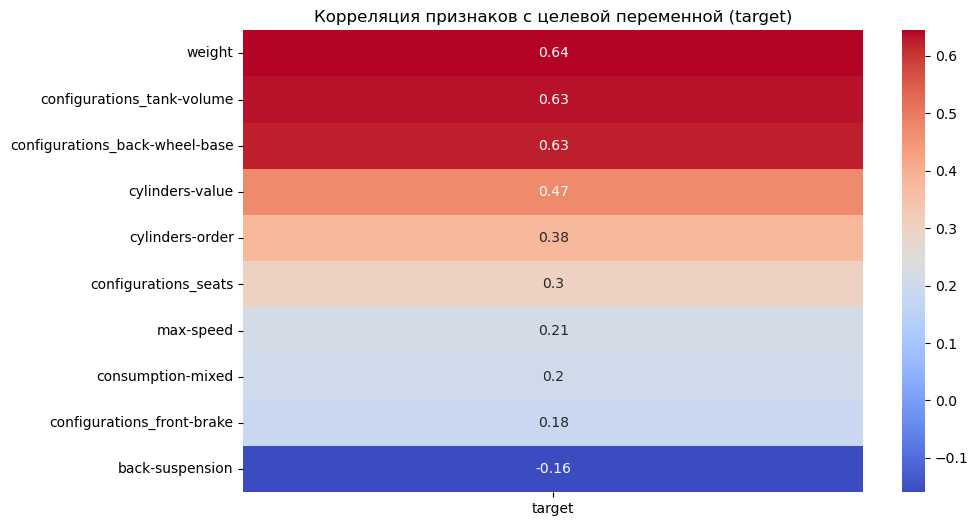

In [98]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix.loc[corr_features.index, ["target"]], annot=True, cmap="coolwarm")
plt.title("Корреляция признаков с целевой переменной (target)")
plt.show()

**Увидим, что значения корреляций в целом не самые плохие, попробуем поработать с такими данными. Перед обучением модели удалим все столбцы, которые бесполезны для модели или могут ее испортить**

- столбцы с большим количеством пропусков
- столбцы с низкой корреляцией

In [100]:
#удаляем столбцы, где раньше обнаружили много пропусков
df = df.drop('battery-capacity', axis = 1)
df = df.drop('power-electro-kw', axis = 1)

In [101]:
#удаляем столбцы с низкой корреляцией
corr_matrix = df.corr()
target_corr = corr_matrix["target"].abs().sort_values(ascending=False)
low_correlation_features = target_corr[target_corr < 0.05].index
df.drop(columns=low_correlation_features, inplace=True)

In [102]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
train_X

,back-suspension,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-start,engine-stop,engine-type,gear-type,...,valves,weight,configurations_auto-premiere,configurations_back-wheel-base,configurations_front-brake,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_light-and-commercial
22607,3,11636,9.5,7.4,0,4,1997,2000,2,0,...,2,1290.0,11642,1415.0,4,13,50.0,2000.0,16,0
36531,8,31764,9.0,7.4,0,4,1990,1993,2,1,...,0,935.0,31785,1310.0,1,13,48.0,1996.0,23,0
24048,8,2773,8.8,6.8,0,4,2009,2012,2,1,...,2,1373.0,2763,1558.0,4,13,56.0,2012.0,10,0
34819,3,52039,14.0,5.3,0,4,2015,2017,0,1,...,2,1430.0,52081,1590.0,4,13,56.0,2017.0,16,0
1328,3,20689,18.0,7.5,0,5,2004,2005,0,1,...,2,1485.0,20685,1560.0,4,13,70.0,2009.0,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,6,42729,16.5,4.7,0,4,2017,0,0,2,...,2,1655.0,42742,1630.0,4,13,68.0,2004.0,10,0
11284,0,46093,8.1,7.4,3,7,1987,1990,2,0,...,0,1398.0,46131,1486.0,4,13,82.0,1996.0,34,0
38158,3,48819,10.0,7.6,0,4,2018,0,2,0,...,2,1562.0,48858,1636.0,4,13,62.0,2004.0,26,0
860,10,9346,22.4,7.4,0,4,1992,1995,0,1,...,0,1398.0,9412,1460.0,1,13,50.0,1995.0,16,0


In [104]:
reg = LinearRegression().fit(train_X, train_y)

In [105]:
reg.score(train_X, train_y)

0.5816819881232997

In [106]:
reg.score(test_X, test_y)

0.588714643602881

In [107]:
mean_squared_error(reg.predict(train_X), train_y)

22926.708576727826

In [108]:
mean_squared_error(reg.predict(test_X), test_y)

23830.919913059035

Выводы:

Улучшение модели действительно произошло

- R^2 train 45.55% -> 58,16%
- R^2 test 46.46% -> 58.87%

Конечно, это тоже далеко не идеальный результат, но уже больше приближен к хорошей модели. Т.к. у данных нет описания, делать какие-то преобразования довольно сложно (выбросы, аномалии, ошибка в записях и т.д) и не факт, что приведет к правильному результату. 

Поэтому просто ради интереса проведем еще тест с рандомным лесом, который устойчив к "сырым" данным и умеет работать с данными без линейной зависимости

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_X, train_y)

y_pred_rf = rf_model.predict(test_X)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [111]:
mse_rf = mean_squared_error(test_y, y_pred_rf)
r2_rf = r2_score(test_y, y_pred_rf)

print(f'MSE равно {mse_rf:.6f}')
print(f'R^2 равно {r2_rf:.6f}')

MSE равно 3113.684606
R^2 равно 0.946263


Рандомный лес и правда очень хорошо сработал, но R^2 настораживает и тут. 94,6% довольно много, есть вероятность, что модель переобучается